In [20]:
import numpy as np
import pandas_ta as ta
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data = pd.read_csv('dataset/EURUSDX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1.203398,1.204007,1.194401,1.196501,1.196501,0.0
1,2003-12-02,1.196101,1.210903,1.194600,1.208897,1.208897,0.0
2,2003-12-03,1.209000,1.213003,1.207700,1.212298,1.212298,0.0
3,2003-12-04,1.212004,1.214403,1.204398,1.208094,1.208094,0.0
4,2003-12-05,1.207802,1.219096,1.206593,1.218695,1.218695,0.0


In [8]:
data.shape

(4870, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4870 non-null   object 
 1   Open       4841 non-null   float64
 2   High       4841 non-null   float64
 3   Low        4841 non-null   float64
 4   Close      4841 non-null   float64
 5   Adj Close  4841 non-null   float64
 6   Volume     4841 non-null   float64
dtypes: float64(6), object(1)
memory usage: 266.5+ KB


In [10]:
data['RSI'] = ta.rsi(data['Close'], timeperiod=15) 
data['EMA20'] = ta.ema(data['Close'], timeperiod=20) 
data['EMA100'] = ta.ema(data['Close'], timeperiod=100)
data['EMA150'] = ta.ema(data['Close'], timeperiod=150) 
data['TargetNextClose'] = data['Close'].shift(-1)
data['TargetClass'] = np.where(data['TargetNextClose'] > data['Close'], 1, 0)

In [11]:
data.dropna(inplace=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,EMA20,EMA100,EMA150,TargetNextClose,TargetClass
14,2003-12-19,1.242205,1.243503,1.235102,1.238497,1.238497,0.0,77.989155,1.229897,1.229897,1.229897,1.239895,1
15,2003-12-22,1.235697,1.244601,1.235697,1.239895,1.239895,0.0,78.756594,1.231714,1.231714,1.231714,1.240003,1
16,2003-12-23,1.239895,1.267202,1.238804,1.240003,1.240003,0.0,78.818037,1.233221,1.233221,1.233221,1.245299,1
17,2003-12-24,1.240095,1.247194,1.240003,1.245299,1.245299,0.0,81.624719,1.235417,1.235417,1.235417,1.244803,0
18,2003-12-25,1.245702,1.247007,1.244307,1.244803,1.244803,0.0,80.548250,1.237124,1.237124,1.237124,1.243194,0


In [12]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'RSI', 'EMA20', 'EMA100', 'EMA150', 'TargetNextClose']])

X = pd.DataFrame(scaled_features, columns=['Open', 'High', 'Low', 'Close', 'RSI', 'EMA20', 'EMA100', 'EMA150', 'TargetNextClose'])
y = data['TargetClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(n_estimators=50, random_state=0)
clf3 = GaussianNB()

voting_clf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.8546209761163032


In [14]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_log}")

Logistic Regression Accuracy: 0.8151609553478713


In [15]:
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree accuracy: {accuracy_dt}")

Decision Tree accuracy: 0.8359293873312564


In [16]:
gaussianNB = GaussianNB()
gaussianNB.fit(X_train, y_train)
y_pred_gaussianNB = gaussianNB.predict(X_test)
accuracy_gaussianNB = accuracy_score(y_test, y_pred_gaussianNB)
print(f"Gaussian NB accuracy : {accuracy_gaussianNB}")

Gaussian NB accuracy : 0.5005192107995846


In [17]:
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)
y_pred_adaboost = adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f"Ada Boost Classifier accuracy: {accuracy_adaboost}")

c:\Users\viswe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost Classifier accuracy: 0.5898234683281413


In [18]:
grad_boost = GradientBoostingClassifier(random_state=0)
grad_boost.fit(X_train, y_train)
y_pred_grad_boost = grad_boost.predict(X_test)
accuracy_grad_boost = accuracy_score(y_test, y_pred_grad_boost)
print(f"Gradient Boosting Classifier accuracy: {accuracy_grad_boost}")

Gradient Boosting Classifier accuracy: 0.7767393561786086


c:\Users\viswe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\viswe\AppData\Local\Temp\ipykernel_7428\3131044712.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis', width=0.5)


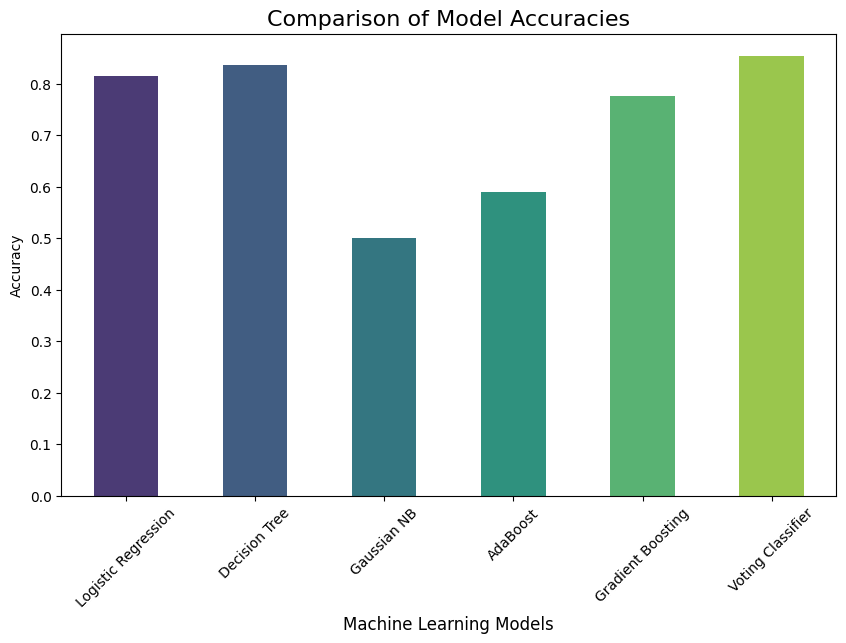

In [19]:
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt_clf,
    'Gaussian NB': gaussianNB,
    'AdaBoost': adaboost,
    'Gradient Boosting': grad_boost,
    'Voting Classifier': voting_clf
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    

accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='viridis', width=0.5)
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=10)
plt.xticks(rotation=45)
plt.show()

C:\Users\viswe\AppData\Local\Temp\ipykernel_7428\2579126504.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  precision_table = pd.concat([precision_table, row], ignore_index=True)
c:\Users\viswe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


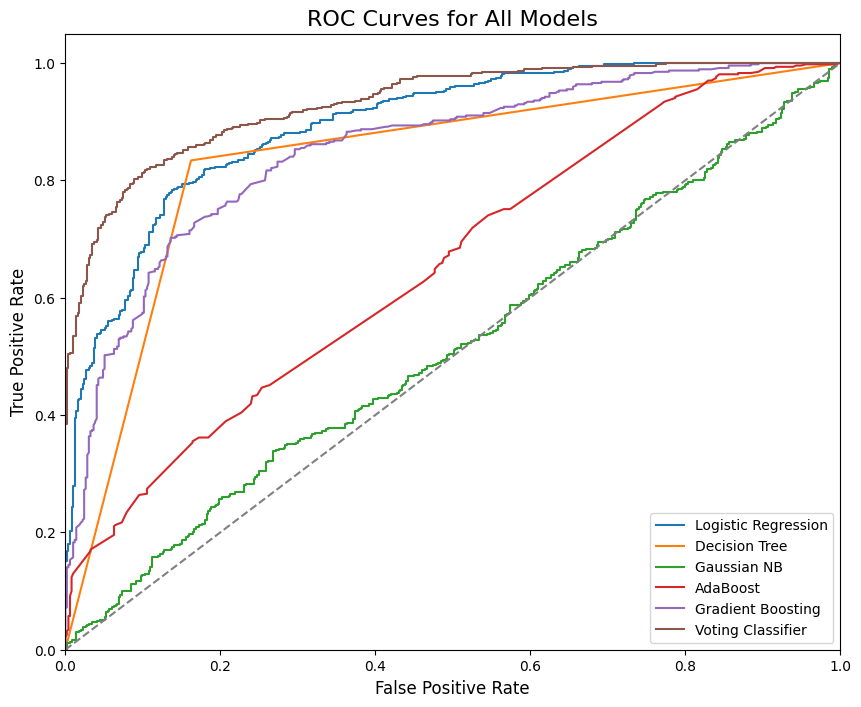

                 Model   TP   TN   FP   FN  Precision  Accuracy
0  Logistic Regression  379  406   87   91   0.813305  0.815161
1        Decision Tree  392  413   80   78   0.830508  0.835929
2          Gaussian NB  285  197  296  185   0.490534  0.500519
3             AdaBoost  319  249  244  151   0.566607  0.589823
4    Gradient Boosting  373  375  118   97   0.759674  0.776739
5    Voting Classifier  388  435   58   82   0.869955  0.854621


In [21]:
fpr = {} 
tpr = {}  
roc_auc = {} 

precision_table = pd.DataFrame(columns=['Model', 'TP', 'TN', 'FP', 'FN', 'Precision', 'Accuracy'])

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
    
    fpr[name], tpr[name], _ = roc_curve(y_test, y_pred_prob)
    roc_auc[name] = auc(fpr[name], tpr[name])
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    precision = precision_score(y_test, y_pred, zero_division=1)
    accuracy = accuracy_score(y_test, y_pred)
    row = pd.DataFrame({
        'Model': [name],
        'TP': [tp],
        'TN': [tn],
        'FP': [fp],
        'FN': [fn],
        'Precision': [precision],
        'Accuracy': [accuracy]
    })
    
    precision_table = pd.concat([precision_table, row], ignore_index=True)

plt.figure(figsize=(10, 8))
for name in models.keys():
    plt.plot(fpr[name], tpr[name], label=f'{name}')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves for All Models', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc='lower right')
plt.show()
print(precision_table)
